In [2]:
! pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00:00:0100:01


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read in the cleaned csv
cleaned_df = pd.read_csv('Data/filtered_df.csv')

In [4]:
#Inspect the columns and rows
cleaned_df

,Unnamed: 0,Date,Location,Demographic_Category,census,Not_Vaccinated,Administered_Dose1,Series_Complete_Yes
0,882360,2021-12-30,1,1,52055.0,3116.0,48939.0,42161.0
1,882361,2021-12-30,2,1,481323.0,123150.0,358173.0,262023.0
2,882362,2021-12-30,35,26,135005.0,103698.0,31307.0,20149.0
3,882363,2021-12-30,36,26,133254.0,120857.0,12397.0,6750.0
4,882364,2021-12-30,37,28,526217.0,105711.0,420506.0,358267.0
...,...,...,...,...,...,...,...,...
77395,959755,2021-12-01,45,11,10184.0,10184.0,0.0,0.0
77396,959756,2021-12-01,17,46,3005.0,795.0,2210.0,2075.0
77397,959757,2021-12-01,50,46,6524.0,1830.0,4694.0,4018.0
77398,959758,2021-12-01,14,9,40789796.0,8044258.0,32745538.0,29013930.0


In [5]:
# Drop unneccessary column
cleaned_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
#Re-inspect the columns once again
cleaned_df.columns

Index(['Date', 'Location', 'Demographic_Category', 'census', 'Not_Vaccinated',
       'Administered_Dose1', 'Series_Complete_Yes'],
      dtype='object')

In [7]:
#Check the data types of each column
cleaned_df.dtypes

Date                     object
Location                  int64
Demographic_Category      int64
census                  float64
Not_Vaccinated          float64
Administered_Dose1      float64
Series_Complete_Yes     float64
dtype: object

In [8]:
# Transforming the Date column from object to float
cleaned_df['Date'] = pd.to_numeric(cleaned_df['Date'],errors='coerce')

In [9]:
# Check if there are any missing data
cleaned_df.isna().sum()

Date                    77400
Location                    0
Demographic_Category        0
census                   3600
Not_Vaccinated           3600
Administered_Dose1          0
Series_Complete_Yes         0
dtype: int64

In [10]:
#Check the data types again
cleaned_df.dtypes

Date                    float64
Location                  int64
Demographic_Category      int64
census                  float64
Not_Vaccinated          float64
Administered_Dose1      float64
Series_Complete_Yes     float64
dtype: object

In [11]:
#Check the shape again
cleaned_df.shape

(77400, 7)

# Modeling 
### Using the pipeline that encompasses standardscaler, polynomialfeatures, RFE and Ridge regression

In [12]:
# Selecting the features to be put into the model
features = cleaned_df[['Date', 'census', 'Not_Vaccinated',
                       'Administered_Dose1', 'Series_Complete_Yes', 'Location', 'Demographic_Category']]

#Set our X (features to be considered) and y (The target column that we want to predict)
X = features
y = cleaned_df['Series_Complete_Yes']

In [13]:
# Set up the pipeline
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(), RFE(Ridge()), Ridge(max_iter=10_000))

In [14]:
#Train, test split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
#Double check to make sure if there are any missing values
X.isna().sum()

Date                    77400
census                   3600
Not_Vaccinated           3600
Administered_Dose1          0
Series_Complete_Yes         0
Location                    0
Demographic_Category        0
dtype: int64

In [16]:
#Fill in the missing values in the training set
my_imputer = SimpleImputer(missing_values = np.nan, strategy ='constant', fill_value=0)
 
# Fitting the data to the imputer object
imputed_X = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

In [17]:
#Double check to make sure if there are any missing values
y.isna().sum()

0

In [18]:
#Check the train.shape one more time
imputed_X.shape

(51858, 7)

In [19]:
#Check the test.shape one more time
imputed_X_test.shape

(25542, 7)

In [20]:
#Fit the pipe into our data
pipe.fit(imputed_X, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('rfe', RFE(estimator=Ridge())),
                ('ridge', Ridge(max_iter=10000))])

# Model Evalaution / Metrics

In [21]:
# Training score
pipe.score(imputed_X, y_train)

0.9999977709519866

In [22]:
#Testing score
pipe.score(imputed_X_test, y_test)

0.9999978038299226

# Prediction of y

In [23]:
y_pred = pipe.predict(imputed_X)

In [24]:
y_pred[:10]

array([ 1.97794720e+05,  7.35421338e+04,  2.11787356e+05,  2.36035728e+05,
       -1.14443997e+03,  3.05364544e+06,  9.92227543e+02,  3.48683677e+05,
        4.08210282e+04,  1.78823647e+05])

# Dummy Regressor -> Find out the Baseline Mean Square Error

In [25]:
from sklearn.dummy import DummyRegressor

In [26]:
lr = LinearRegression().fit(imputed_X, y_train)

In [27]:
lr_dummy_mean = DummyRegressor(strategy = 'mean').fit(imputed_X, y_train)
  
lr_dummy_median = DummyRegressor(strategy = 'median').fit(imputed_X, y_train)

In [28]:
y_predict = lr.predict(imputed_X_test)

In [29]:
y_predict_dummy_mean = lr_dummy_mean.predict(imputed_X_test)
y_predict_dummy_median = lr_dummy_median.predict(imputed_X_test)

In [30]:
print('Linear model, coefficients: ', lr.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean, squared=False)))

Linear model, coefficients:  [ 0.00000000e+00 -8.71525074e-15  2.90739655e-15  1.08246745e-15
  1.00000000e+00 -8.48749518e-12 -1.05553540e-11]
Mean squared error (dummy): 4033958.63


# Root Mean Squared Error of the Pipeline

In [31]:
# Training RMSE
print('train:', mean_squared_error(y_train, pipe.predict(imputed_X), squared=False))

# Testing RMSE
print('test:', mean_squared_error(y_test, pipe.predict(imputed_X_test), squared=False))

train: 6229.383791213293
test: 5978.04900018259


# Cross val score

In [32]:
scores = cross_val_score(estimator=pipe, X=imputed_X, y=y_train, cv=5)
scores

array([0.99999666, 0.99999772, 0.99999636, 0.99999651, 0.9999976 ])

In [33]:
# Generting cross validated predictions 
scores[:5]

array([0.99999666, 0.99999772, 0.99999636, 0.99999651, 0.9999976 ])

In [34]:
# get the standard deviation from cross validated testing score
scores.std()

5.740074799917236e-07

In [35]:
# Running cross validation on the training subset
# cv changes the number of folds
cross_val_score(pipe, imputed_X, y_train, cv=7).mean()

0.999997067027012

# R2 score

In [36]:
from sklearn import metrics

print('r2 score of the ridge regression: ',metrics.r2_score(y_train, y_pred))

print('mean squared error on the training: ', metrics.mean_squared_error(y_train, y_pred,squared=False))

r2 score of the ridge regression:  0.9999977709519866
mean squared error on the training:  6229.383791213293


# Baseline for y

In [37]:
# Baseline
y.mean()

666125.5059302326

# Arima 

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
US_df = cleaned_df[["Series_Complete_Yes", "Date"]].copy()

In [60]:
cleaned_df.head()

,Date,Location,Demographic_Category,census,Not_Vaccinated,Administered_Dose1,Series_Complete_Yes
0,NaN,1,1,52055.0,3116.0,48939.0,42161.0
1,NaN,2,1,481323.0,123150.0,358173.0,262023.0
2,NaN,35,26,135005.0,103698.0,31307.0,20149.0
3,NaN,36,26,133254.0,120857.0,12397.0,6750.0
4,NaN,37,28,526217.0,105711.0,420506.0,358267.0


In [59]:
US_df.head

<bound method NDFrame.head of        Series_Complete_Yes  Date
0                  42161.0   NaN
1                 262023.0   NaN
2                  20149.0   NaN
3                   6750.0   NaN
4                 358267.0   NaN
...                    ...   ...
77395                  0.0   NaN
77396               2075.0   NaN
77397               4018.0   NaN
77398           29013930.0   NaN
77399               4462.0   NaN

[77400 rows x 2 columns]>

In [57]:
US_df.groupby("Date").mean()

,Series_Complete_Yes
Date,


In [54]:
decomp = seasonal_decompose(x=cleaned_df["Series_Complete_Yes"])
decomp.plot();

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

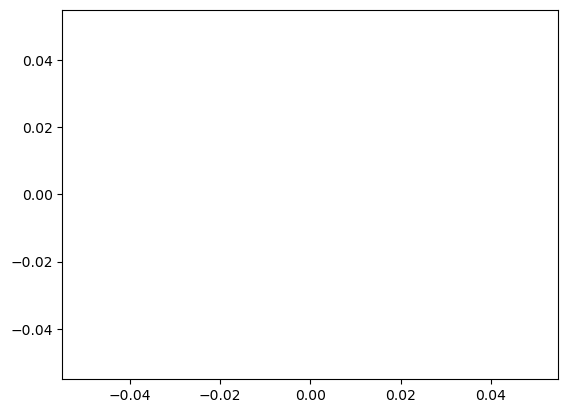

In [52]:
plt.plot(cleaned_df["Series_Complete_Yes"], cleaned_df["Date"]);